# 14.3. The SD and the Normal Curve

- the mean is the balance point of the histogram.
- However, there is one shape of distribution for which the SD is almost as clearly identifiable as the mean. That is the bell-shaped disribution. 

## 14.3.1. A Roughly Bell-Shaped Histogram of Data

- baby.csv: The mothers' heights distribution

In [1]:
path_data = '../../data/'
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
baby = Table.read_table(path_data + 'baby.csv')
baby.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


In [3]:
heights = baby.select('Maternal Height')

In [4]:
mean_height = heights[0].mean()
mean_height

64.049403747870528

In [5]:
##### use Python
# round(mean_height, 2)   ### 64.049999999999997
# round(mean_height)      ### 64

##### use np
np.round(mean_height)   ### 64.0
# np.round(mean_height, 2)  ### 64.049999999999997

64.0

In [6]:
sd_height = heights[0].std()
# sd_height                ##### 2.5250254409674375

# round(sd_height)         ##### 3 
# round(sd_height, 2)      ##### 2.5299999999999998 

np.round(sd_height, 1)     ##### 2.5
# np.round(sd_height, 2)   ##### 2.5299999999999998 something is very wrong here

#####
##### check with Pandas DataFrame df.describe()
#####

2.5

In [7]:
##### just for fun
import pandas as pd

########## 2 decimal places for everything
pd.set_option('display.float_format', lambda x: '%.2f' % x)
##########
### std 2.53 is better than 2.5 ###


##### df describe()
baby.to_df().describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.00,1174.00,1174.00,1174.00,1174.00
mean,119.46,279.10,27.23,64.05,128.48
std,18.33,16.01,5.82,2.53,20.73
min,55.00,148.00,15.00,53.00,87.00
25%,108.00,272.00,23.00,62.00,114.25
50%,120.00,280.00,26.00,64.00,125.00
75%,131.00,288.00,31.00,66.00,139.00
max,176.00,353.00,45.00,72.00,250.00


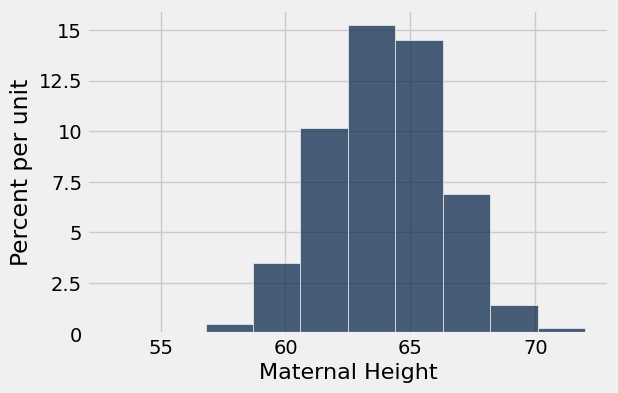

In [8]:
##### now let's take a look at height
baby.select('Maternal Height').hist()

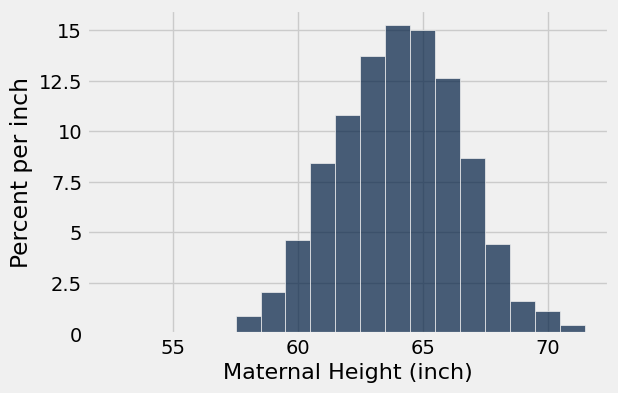

In [9]:
### take a look at describe for bins
### note this is different from the book

baby.select('Maternal Height').hist(bins=np.arange(52.5, 72.5, 1), unit = 'inch')

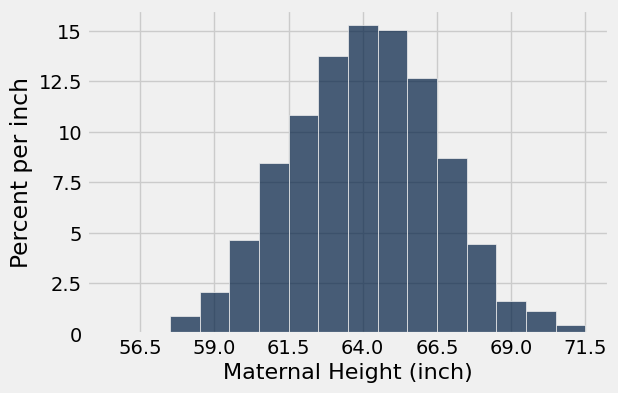

In [11]:
### make it look even better: xticks 

# positions = np.arange(-3, 3.1, 1.05)*sd_height + mean_height
# positions = np.arange(-3, 3.1, 1)*2.5 + mean_height
# positions = np.arange(-3, 4, 1)*2.5 + mean_height
# plt.xticks(positions)

baby.select('Maternal Height').hist(bins=np.arange(55.5, 72.5, 1), unit = 'inch')
positions = np.arange(-3, 3.1, 1)*2.5 + 64
plt.xticks(positions);
##### now 64 is in the middle #####

## 14.3.2. How to Spot the SD on a Bell Shaped Curve

- formally, the curve has a point of inflection. That point is one SD above average. It is the point 
*z* = 1, which is “average plus 1 SD” = 66.5 inches.

- In general, **for bell-shaped distributions, the SD is the distance between the mean and the points of inflection on either side**.



## 14.3.3. The standard normal curve

- drawn using the standard unit
- The equation:

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$


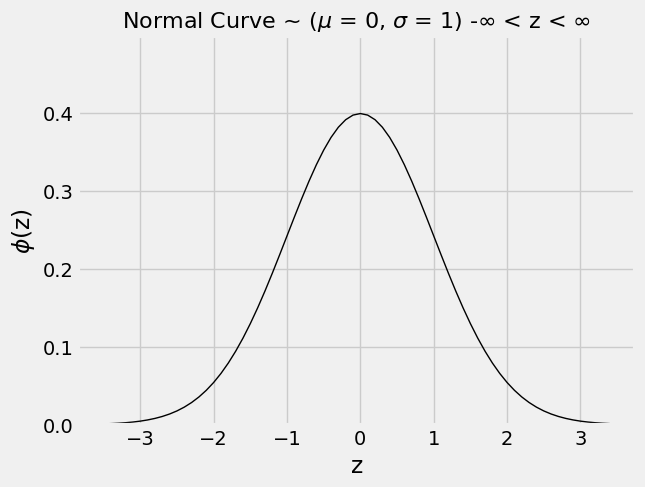

In [12]:
import math
import scipy as sp
plot_normal_cdf()

- The **total area under the curve is 1**. So you can think of it as a histogram drawn to the density scale.

- The curve is **symmetric about 0**. So if a variable has this distribution, its **mean and median** are both 0.

- The **points of inflection** of the curve are at -1 and +1.
- If a variable has this distribution, its **SD** is 1. The **normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram**.

Since we are thinking of the curve as a smoothed histogram, we will want to represent proportions of the total amount of data by areas under the curve.

Areas under smooth curves are often found by calculus, using a method called integration. It is a fact of mathematics, however, that the standard normal curve cannot be integrated in any of the usual ways of calculus.

Therefore, areas under the curve have to be approximated. That is why almost all statistics textbooks carry tables of areas under the normal curve. It is also why all statistical systems, including a module of Python, include methods that provide excellent approximations to those areas.

In [13]:
from scipy import stats

## 14.3.4. The standard normal “cdf”

The fundamental function for finding areas under the normal curve is stats.norm.cdf. It takes a numerical argument and returns *all the area under the curve* to the left of that number. Formally, it is called the **“cumulative distribution function”** of the standard normal curve. That rather unwieldy mouthful is abbreviated as **cdf**.



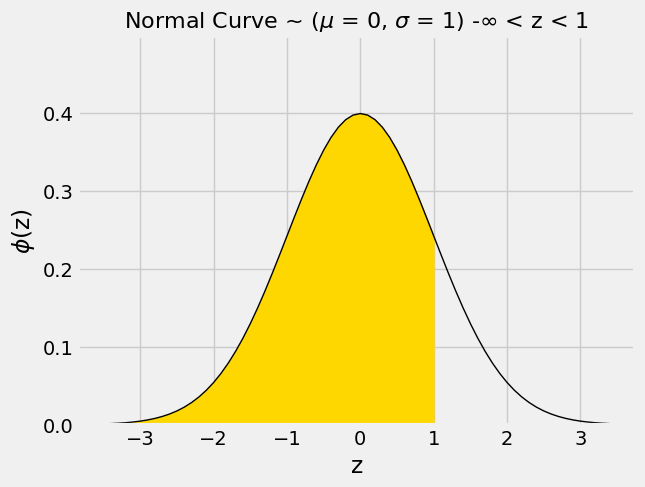

In [14]:
### instead of points ==> areas

plot_normal_cdf(1)

### The numerical value of the shaded area can be found by calling **stats.norm.cdf**.

In [15]:
stats.norm.cdf(1)   ### from scipy.stats

0.84134474606854293

That’s about 84%. We can now use the symmetry of the curve and the fact that the total area under the curve is 1 to find other areas.

The area to the right of *z* = 1 is about 100% - 84% = 16%.

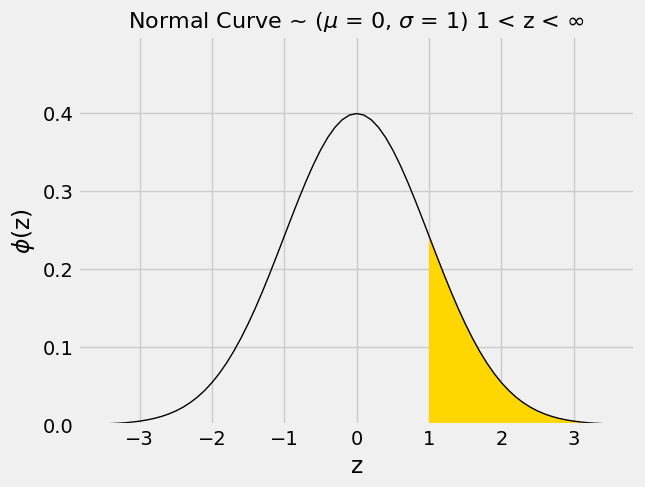

In [16]:
plot_normal_cdf(lbound = 1)

In [17]:
### that is, the right
1 - stats.norm.cdf (1)

0.15865525393145707

The area between *z* = -1 and *z* = 1 can be computed in several different ways. It is the gold area under the curve below.

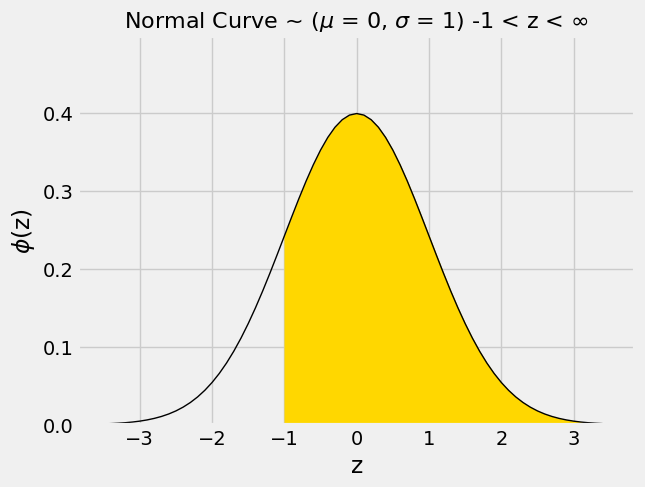

In [18]:
plot_normal_cdf(lbound=-1)

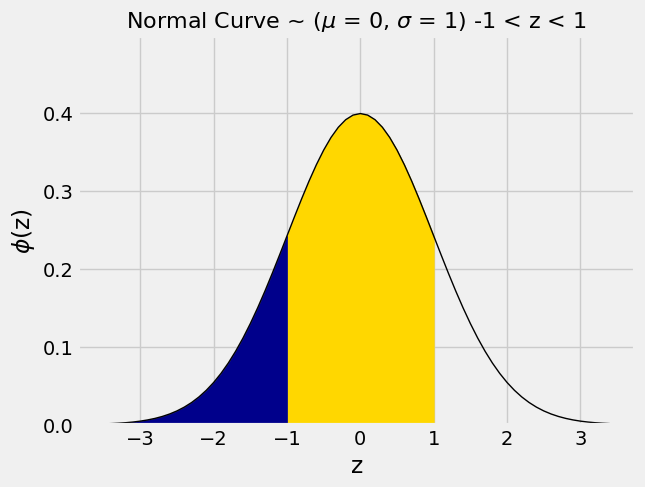

In [22]:
# plot_normal_cdf(1) & lbound -1
plot_normal_cdf(1, lbound=-1)

In [23]:
### yellow ==> 68%
##### (yellow + blue) - blue

stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

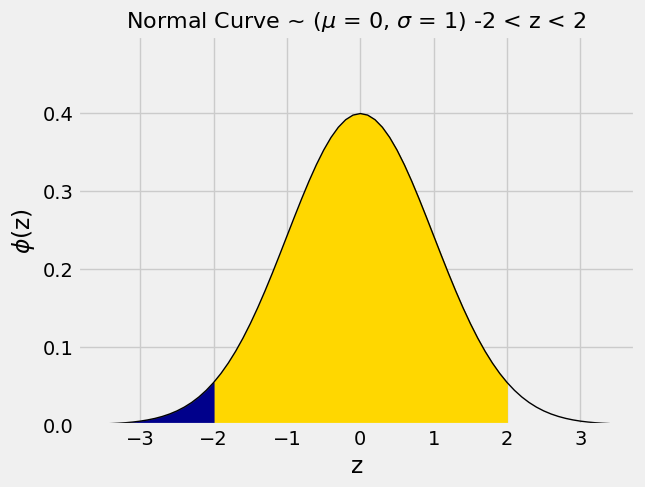

In [25]:
##### now how about 2, -2?
plot_normal_cdf(2, lbound=-2)

In [26]:
### get the percentage of area between 2 SDs
### (yellow + blue) - blue

stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

95% is quite a bit more than Chebychev’s lower bound of 75%. Chebychev’s bound is weaker because it has to work for all distributions. If we know that a distribution is normal, we have good approximations to the proportions, not just bounds.



| Percent in Range    | All Distributions: Bound   | Normal Distribution: Approximation |
| :---------------    | :------------------------  | :--------------------------------- |
| average $\pm$ 1 SD  | at least 0%                | about 68%                          |
| average $\pm$ 2 SDs | at least 75%               | about 95%                          |
| average $\pm$ 3 SDs | at least 88.888...%        | about 99.73%                       |

As in comparison with Chebyshev's bounds